In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
nRowsRead = 1000
df1 = pd.read_csv('METABRIC_RNA_Mutation.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'METABRIC_RNA_Mutation.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 693 columns


In [4]:
df1.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


Параметры, которые больше всего коррелируют со смертностью

In [5]:
#Pivot table for overall survival
corr = pd.pivot_table(df1, columns=['overall_survival'])

In [6]:
#Get top 30 values 
bestDeathCorr30 = corr.iloc[:,0].sort_values(ascending=False).head(30)

In [7]:
#Show top 30 values 
bestDeathCorr30

patient_id                       2497.385047
overall_survival_months           101.688474
age_at_diagnosis                   63.350729
tumor_size                         28.906191
mutation_count                      5.594231
nottingham_prognostic_index         4.276288
lymph_nodes_examined_positive       2.671028
neoplasm_histologic_grade           2.530097
cohort                              1.942056
tumor_stage                         1.861167
radio_therapy                       0.635514
hormone_therapy                     0.592523
aph1a                               0.280890
foxp1                               0.241020
ccnb1                               0.236953
akt1s1                              0.232900
chemotherapy                        0.218692
rassf1                              0.204591
mmp14                               0.199585
stk11                               0.184761
epcam                               0.157607
thsd7a                              0.154287
rps6kb2   

Наибольшая корреляция общей смертности связана с:
1) "overall_survival_months"
2) "age_at_diagnosis"
3) "tumor_size"
4) "mutation_count"
5) "nottingham_prognostic_index"

In [8]:
#Get correlations for living 
bestLifeCorr30 = corr.iloc[:,1].sort_values(ascending=False).head(30)

In [9]:
#Show top 30 values 
bestLifeCorr30

patient_id                       1685.795699
overall_survival_months           156.389176
age_at_diagnosis                   55.827376
tumor_size                         22.895022
mutation_count                      4.428899
nottingham_prognostic_index         3.841194
neoplasm_histologic_grade           2.333333
tumor_stage                         1.638393
cohort                              1.533333
lymph_nodes_examined_positive       1.247312
radio_therapy                       0.709677
hormone_therapy                     0.651613
cdkn2c                              0.540783
hsd17b11                            0.488904
syne1                               0.447815
spry2                               0.422512
igf1                                0.420654
folr2                               0.417026
casp8                               0.393551
pdgfra                              0.372744
psen1                               0.372268
zfp36l1                             0.361655
lama2     

Наибольшая корреляция общей выживаемостью связана с:
1) "overall_survival_months"
2) "age_at_diagnosis"
3) "tumor_size"
4) "mutation_count"
5) "nottingham_prognostic_index"

Общая выживаемость в зависимости от статуса лимфатических узлов (положительные узлы)

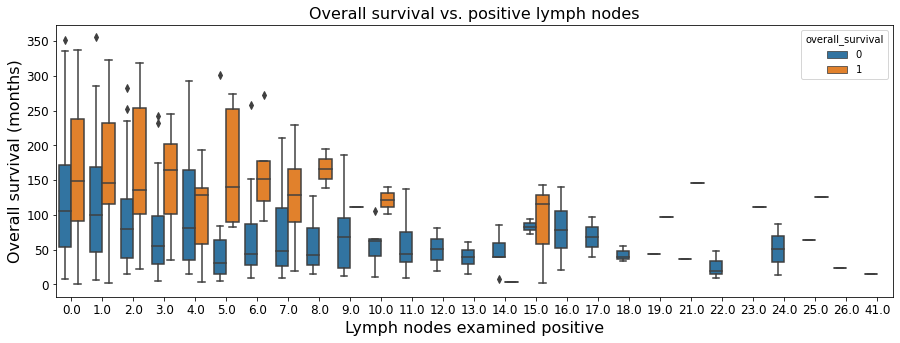

In [10]:
#Get boxplot graphs for overall surival months and some interesting categories 
#f, axes = plt.subplots(2, 1, figsize=(20,15), sharex=False)

#Main plot to be plotted 
plt.figure(figsize=(15,5))
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival_months', hue='overall_survival', data=df1) #ax=axes[0, 0]
plt.xlabel("Lymph nodes examined positive", fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel("Overall survival (months)", fontsize=16)
plt.yticks(fontsize=12)
plt.title("Overall survival vs. positive lymph nodes", fontsize=16)

#Other plots that will not be plotted
#sns.boxplot(x='er_status', y='overall_survival_months', hue='overall_survival', data=df1, ax=axes[1, 0])
#sns.boxplot(x='her2_status_measured_by_snp6', y='overall_survival_months', hue='overall_survival', data=df1, ax=axes[1, 0])
#sns.boxplot(x='tumor_stage', y='overall_survival_months', hue='overall_survival', data=df1, ax=axes[1, 1])
#sns.boxplot(x='pr_status', y='overall_survival_months', hue='overall_survival', data=df1, ax=axes[2, 0])
#sns.boxplot(x='neoplasm_histologic_grade', y='overall_survival_months', hue='overall_survival', data=df1, ax=axes[2, 1])

#plt.tight_layout()

plt.savefig("")

In [11]:
#Group by overall survival to find the survival months mean and std. 
survivalMonths = df1.groupby(by='overall_survival')
survivalMonthsMean = survivalMonths.mean()['overall_survival_months']
survivalMonthsStd = survivalMonths.std()['overall_survival_months']

In [12]:
print (survivalMonthsMean)
print(survivalMonthsStd)

overall_survival
0    101.688474
1    156.389176
Name: overall_survival_months, dtype: float64
overall_survival
0    74.877092
1    77.879029
Name: overall_survival_months, dtype: float64


Общая выживаемость: 156.4 ± 77.9
Общая смертность: 101.7 ± 74.9

Корреляционный анализ лечения

In [13]:
#Get treatment list 
treatmentList = ["type_of_breast_surgery", "chemotherapy", "hormone_therapy", "radio_therapy"] #cut, poison, hormones, burn 

In [14]:
#Get correlations between the treatments 
dfTreatments = df1[treatmentList]
dfTreatments["type_of_breast_surgery"] = dfTreatments["type_of_breast_surgery"].apply(lambda x: 1 if "MASTECTOMY" in str(x) else 0)

/home/dimasik99/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
#Rename columns and get correlation 
dfTreatments.rename(columns={"type_of_breast_surgery": "Mastectomy", "chemotherapy": "Chemotherapy", "hormone_therapy": "Hormone Therapy", "radio_therapy": "Radio Therapy"}, inplace=True)
dfTreatmentsCorr = dfTreatments.corr() 

/home/dimasik99/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:>

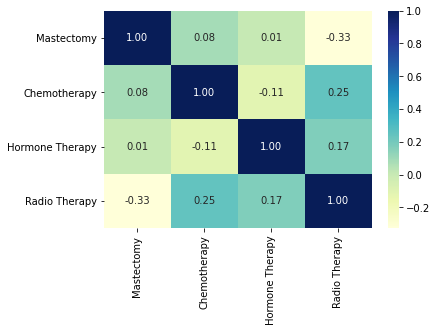

In [16]:
#Display heatmap 
sns.heatmap(dfTreatmentsCorr, cmap = "YlGnBu", annot=True, fmt=".2f")

Радиотерапия и химиотерапия комбинируются чаще, чем другие виды терапии

Анализ эффективности лечения

In [21]:
#Get the overall survival % in 100%. 
mastectomyCounts = (dfTreatments["Mastectomy"].value_counts()[1]/dfTreatments["Mastectomy"].value_counts().sum())*100
chemoCounts = (dfTreatments["Chemotherapy"].value_counts()[1]/dfTreatments["Chemotherapy"].value_counts().sum())*100
hormoneCounts = (dfTreatments["Hormone Therapy"].value_counts()[1]/dfTreatments["Hormone Therapy"].value_counts().sum())*100
radioCounts = (dfTreatments["Radio Therapy"].value_counts()[1]/dfTreatments["Radio Therapy"].value_counts().sum())*100

In [22]:
#Dictionary of the survival % for each treatment 
treatmentSurvivalDict = {'Mastectomy': mastectomyCounts, 'Chemotherapy': chemoCounts, 'Hormone Therapy':hormoneCounts, 'Radio Therapy': radioCounts}

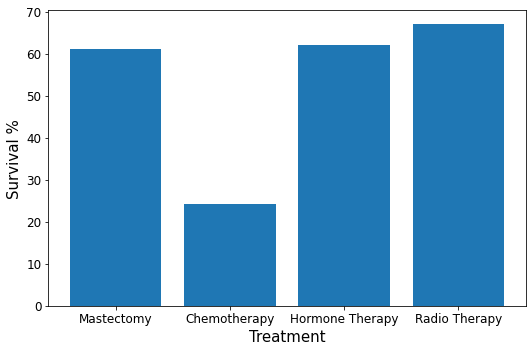

In [23]:
#Plot of each treatment 
plt.figure(figsize=(7.5,5))
plt.bar(list(treatmentSurvivalDict.keys()), list(treatmentSurvivalDict.values()))
plt.xlabel("Treatment", fontsize=15)
plt.ylabel("Survival %", fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()

Наилучшая выживаемость достигается при лучевой терапии, гормональной терапии или мастэктомии